<a href="https://colab.research.google.com/github/AfiaAF/TMP_Env_Impact_Analysis/blob/main/Environment_Impact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environmental Impact of Food Production Analysis

This project analyzes environmental data related to 43 common food products to understand their impact across metrics like carbon emissions, land use, water withdrawals, and eutrophication (enrichment of water bodies with nutrients which stimulate growth of aquatic plant life and subsequently decrease dissolved oxygen).

By identifying patterns in the environmental cost of food, we aim to inform more sustainable food production and consumption practices.

In [ ]:
### Imported Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# List the contents of the specified Google Drive folder
!ls "/content/drive/My Drive/TMP_Env_Impact_Food_Analysis"

'About Dataset-environmental impacts of food.pdf'	    Food_Production.csv
'Environmental Impact of Food Production Project.gslides'


In [ ]:
import os
os.chdir("/content/drive/My Drive/TMP_Env_Impact_Food_Analysis")

!pwd

/content/drive/My Drive/TMP_Env_Impact_Food_Analysis


# Exploratory Data Analysis

In [ ]:
df = pd.read_csv('Food_Production.csv')
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


## Data Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packaging                                                                43 

In [ ]:
df.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327273,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [ ]:
# Checking for Missing Values
df.isnull().sum()

,0
Food product,0
Land use change,0
Animal Feed,0
Farm,0
Processing,0
Transport,0
Packaging,0
Retail,0
Total_emissions,0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),10


## Data Cleaning & Preparation

In [ ]:
# Renaming columns for simplicity
df.columns = df.columns.str.lower().str.replace(' - kg co2 - equivalents per kg product', '').str.replace(' ', '_')

# Adding total_emissions column
emission_cols = [
    'land_use_change', 'animal_feed', 'farm', 'processing', 'transport', 'packaging', 'retail'
]
df['total_emissions'] = df[emission_cols].sum(axis=1)

# Adding category column
df['category'] = df['food_product'].apply(lambda x: 'Animal' if x.lower() in ['beef', 'lamb', 'pork', 'cheese', 'milk', 'eggs', 'fish', 'poultry'] else 'Plant')
df.head()

,food_product,land_use_change,animal_feed,farm,processing,transport,packaging,retail,total_emissions,eutrophying_emissions_per_1000kcal_(gpo₄eq_per_1000kcal),...,freshwater_withdrawals_per_kilogram_(liters_per_kilogram),greenhouse_gas_emissions_per_1000kcal_(kgco₂eq_per_1000kcal),greenhouse_gas_emissions_per_100g_protein_(kgco₂eq_per_100g_protein),land_use_per_1000kcal_(m²_per_1000kcal),land_use_per_kilogram_(m²_per_kilogram),land_use_per_100g_protein_(m²_per_100g_protein),scarcity-weighted_water_use_per_kilogram_(liters_per_kilogram),scarcity-weighted_water_use_per_100g_protein_(liters_per_100g_protein),scarcity-weighted_water_use_per_1000kcal_(liters_per_1000_kilocalories),category
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plant
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plant
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plant
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461,Plant
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480,Plant


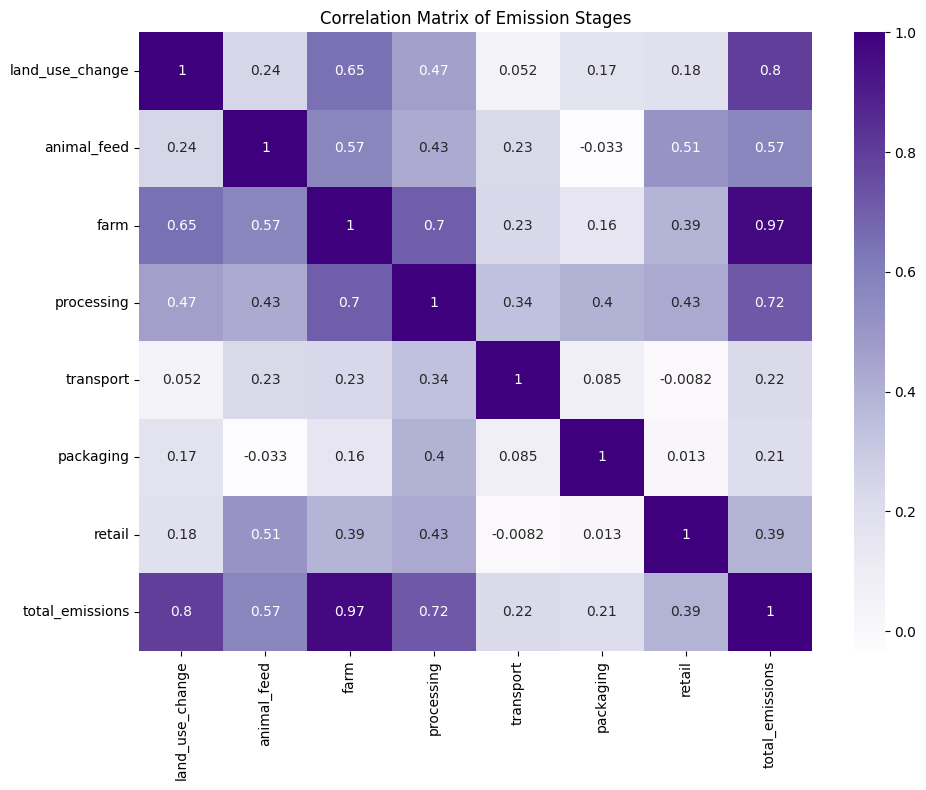

In [ ]:
## Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df[emission_cols + ['total_emissions']].corr()
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title('Correlation Matrix of Emission Stages')
plt.tight_layout()
plt.show()

## Analytical Questions & Answers (with Visualizations)

##### Q1: Which food products have the highest total carbon emissions per kg?
##### Q2: What is the average emission by production stage?
##### Q3: Which food products are most water-intensive per kg?
##### Q4: Which foods contribute most to eutrophication per kg?
##### Q5: How do plant-based and animal-based foods compare in emissions?
##### Q6: Which foods use the most land per kg?
##### Q7: Which foods show the best environmental efficiency?
##### Q8: Is there a correlation between emissions and land use?

### Q1: Which food products have the highest total carbon emissions per kg?


/tmp/ipython-input-2047737589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_emissions, x='total_emissions', y='food_product',  palette='Greens_r')


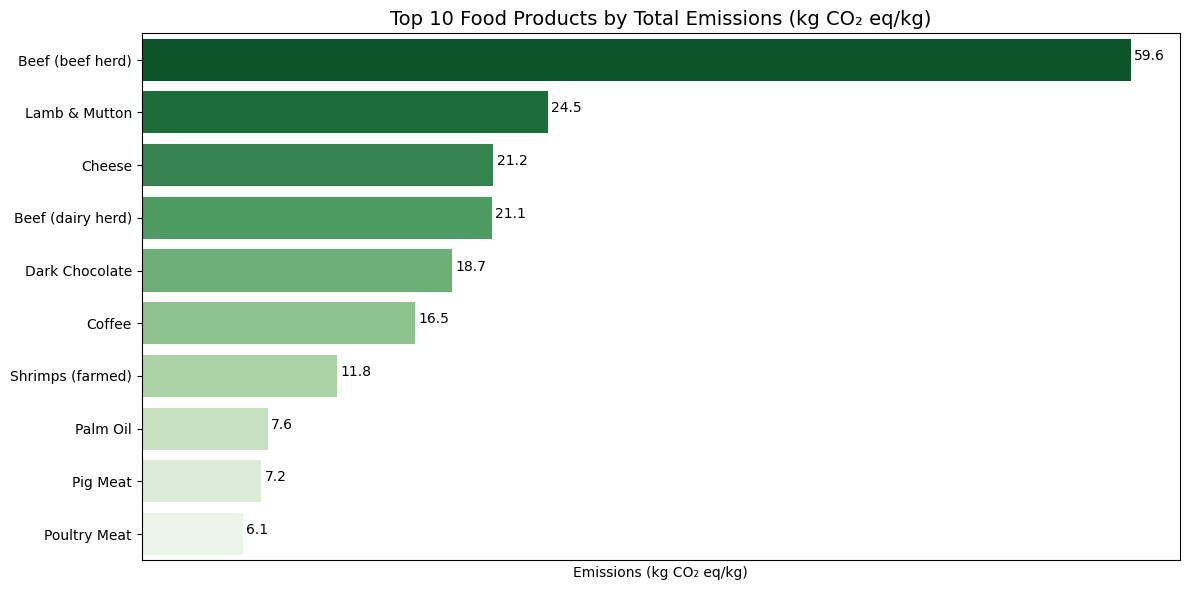

In [ ]:
top10_emissions = df.sort_values("total_emissions", ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top10_emissions, x='total_emissions', y='food_product',  palette='Greens_r')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width()+0.2, p.get_y()+0.4), fontsize=10)

ax.set_title("Top 10 Food Products by Total Emissions (kg CO₂ eq/kg)", fontsize=14)
ax.set_xlabel("Emissions (kg CO₂ eq/kg)")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-ticks
plt.tight_layout()
plt.show()

### Q2: What is the average emission by production stage?



/tmp/ipython-input-1383388826.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


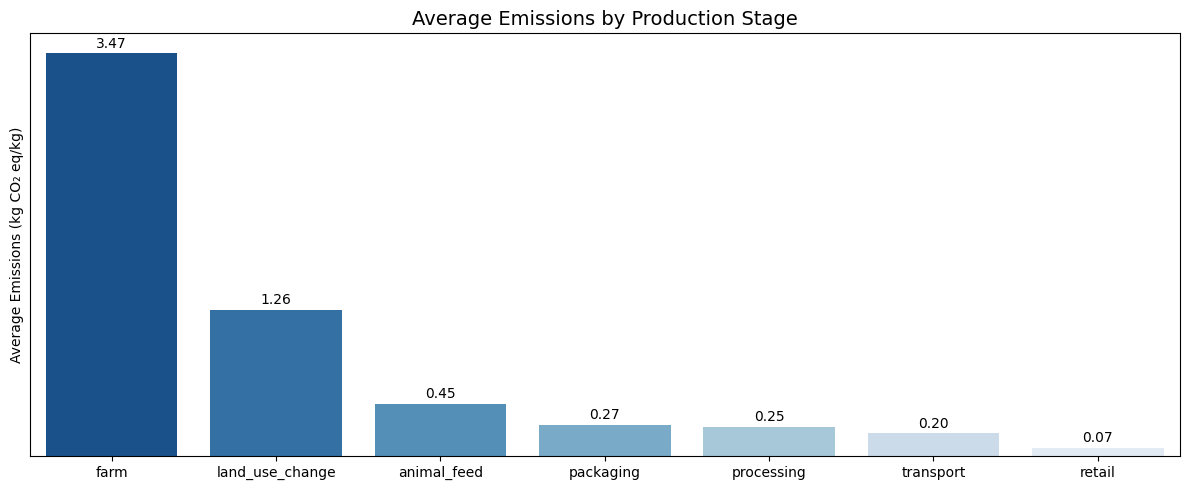

In [ ]:
avg_stage_emissions = df[stage_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
ax = sns.barplot(
    x=avg_stage_emissions.index,
    y=avg_stage_emissions.values,
    palette='Blues_r'
)

# Add data labels on top of each bar
for i, v in enumerate(avg_stage_emissions.values):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center')

# Set chart labels and title
ax.set_title("Average Emissions by Production Stage", fontsize=14)
ax.set_ylabel("Average Emissions (kg CO₂ eq/kg)")
ax.set_xlabel("")
ax.set_yticks([])

plt.tight_layout()
plt.show()

### Q3: Which food products are most water-intensive per kg?

/tmp/ipython-input-3127390919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_water, x='freshwater_withdrawals_per_kilogram_(liters_per_kilogram)', y='food_product', palette='Purples_r')


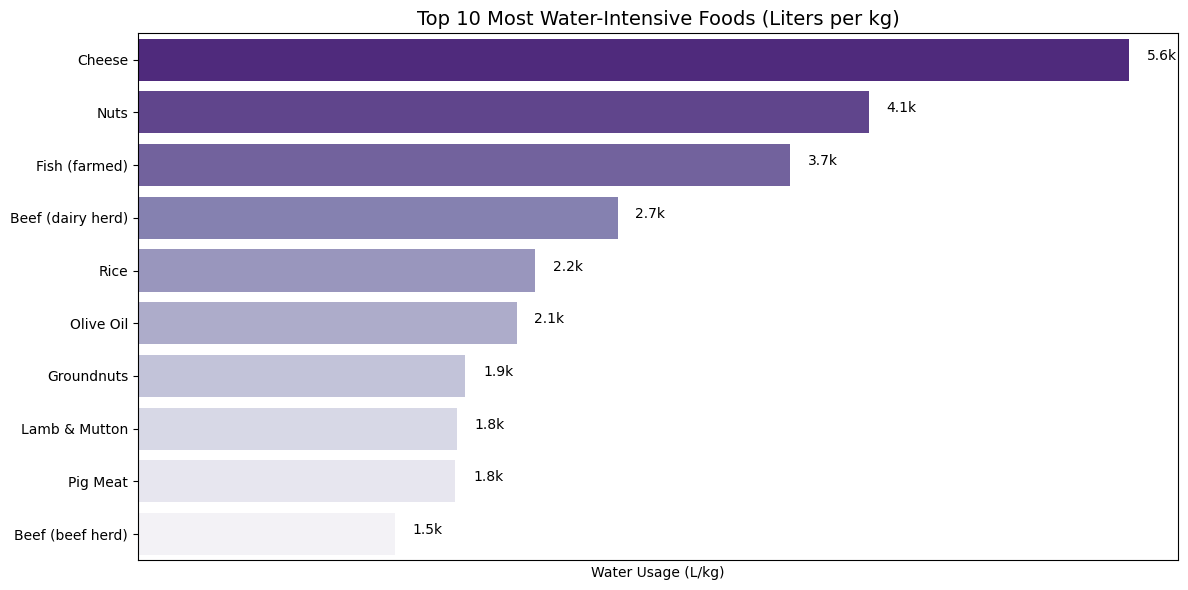

In [ ]:
top_water = df.sort_values('freshwater_withdrawals_per_kilogram_(liters_per_kilogram)', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_water, x='freshwater_withdrawals_per_kilogram_(liters_per_kilogram)', y='food_product', palette='Purples_r')

for p in ax.patches:
    val = p.get_width()
    label = f'{val/1000:.1f}k'
    ax.annotate(label, (val + 100, p.get_y() + 0.4), fontsize=10)

ax.set_title("Top 10 Most Water-Intensive Foods (Liters per kg)", fontsize=14)
ax.set_xlabel("Water Usage (L/kg)")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-ticks
plt.tight_layout()
plt.show()

### Q4: Which foods contribute most to eutrophication per kg?

/tmp/ipython-input-914098412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_eutro, x='eutrophying_emissions_per_kilogram_(gpo₄eq_per_kilogram)', y='food_product', palette='Blues_r')


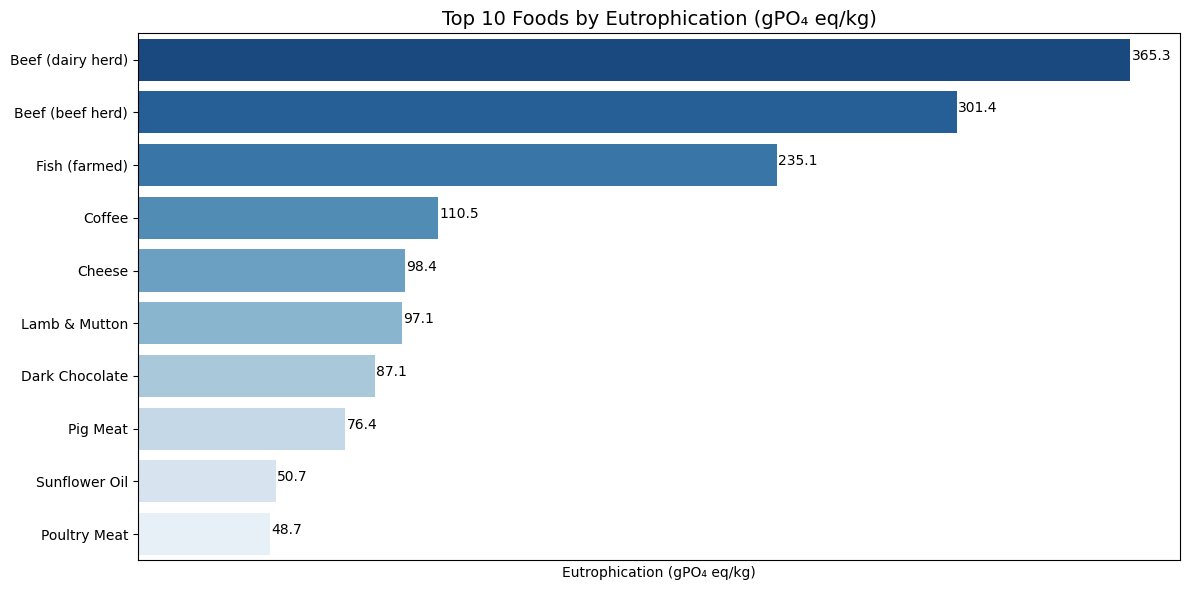

In [ ]:
top_eutro = df.sort_values('eutrophying_emissions_per_kilogram_(gpo₄eq_per_kilogram)', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_eutro, x='eutrophying_emissions_per_kilogram_(gpo₄eq_per_kilogram)', y='food_product', palette='Blues_r')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width() + 0.5, p.get_y() + 0.4), fontsize=10)

ax.set_title("Top 10 Foods by Eutrophication (gPO₄ eq/kg)", fontsize=14)
ax.set_xlabel("Eutrophication (gPO₄ eq/kg)")
ax.set_ylabel("")
ax.set_xticks([])
plt.tight_layout()
plt.show()

### Q5: How do plant-based and animal-based foods compare in emissions?

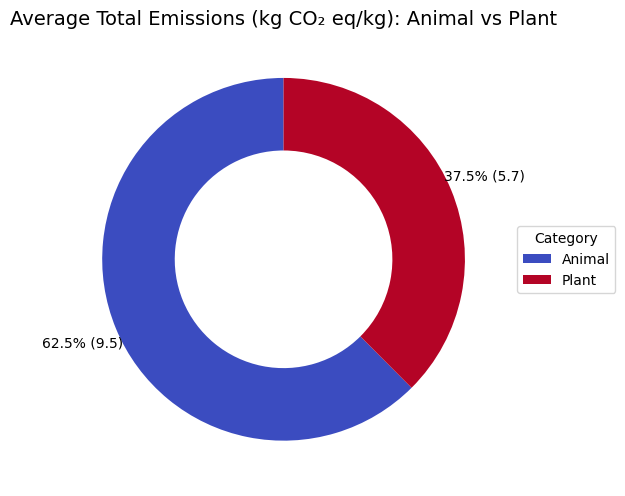

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group and compute average emissions
avg_emissions = df.groupby("category")["total_emissions"].mean()

# Setup
labels = avg_emissions.index.tolist()
values = avg_emissions.values
total = values.sum()

# Colors from coolwarm colormap (2 categories)
colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(values)))

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(
    values,
    colors=colors,
    labels=None,
    startangle=90,
    wedgeprops=dict(width=0.4)
)

# Add labels outside each wedge with % and actual value
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    percentage = values[i] / total * 100
    ax.text(
        1.2 * x, 1.2 * y,
        f"{percentage:.1f}% ({values[i]:.1f})",
        ha='center', va='center', fontsize=10
    )

# Add legend
ax.legend(wedges, labels, title="Category", loc="center left", bbox_to_anchor=(1, 0.5))

# Title
ax.set_title("Average Total Emissions (kg CO₂ eq/kg): Animal vs Plant", fontsize=14)

plt.tight_layout()
plt.show()

### Q6: Which foods use the most land per kg?

/tmp/ipython-input-2619034866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


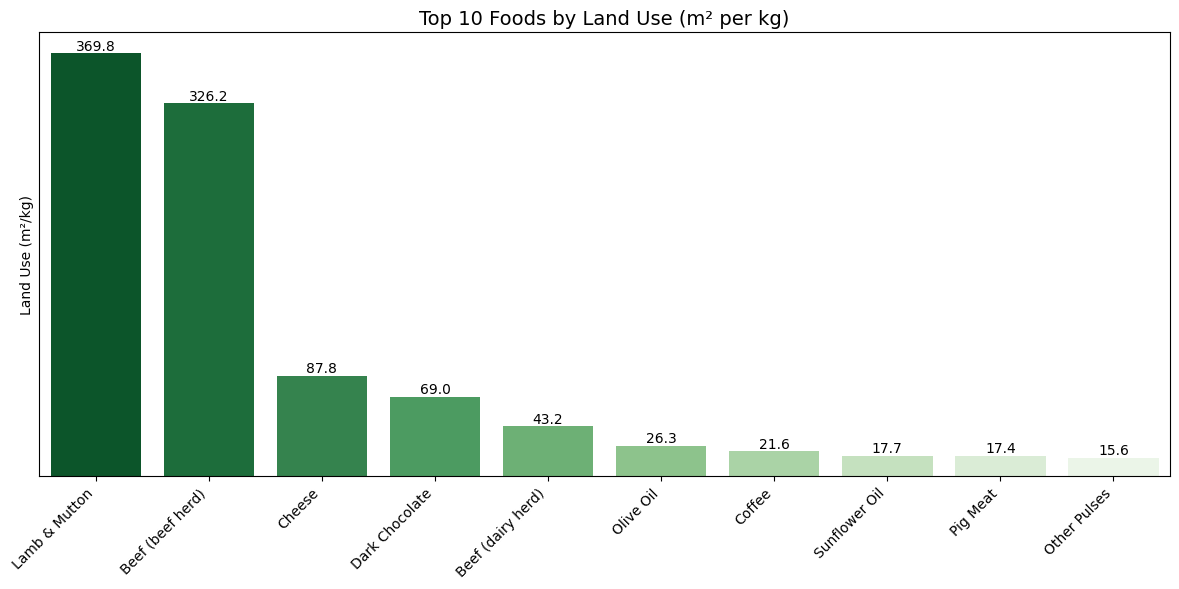

In [ ]:
top_land = df.sort_values("land_use_per_kilogram_(m²_per_kilogram)", ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_land,
    x='food_product',
    y='land_use_per_kilogram_(m²_per_kilogram)',
    palette='Greens_r'
)

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2, height + 0.5),
                ha='center', va='bottom', fontsize=10)

# Set chart title and labels
ax.set_title("Top 10 Foods by Land Use (m² per kg)", fontsize=14)
ax.set_ylabel("Land Use (m²/kg)")
ax.set_xlabel("")
ax.set_yticks([])  # Optional: hides y-axis ticks for cleaner look

# Rotate x labels if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Q7: Which foods show the best environmental efficiency?

In [ ]:
low_impact = df[(df['total_emissions'] < 2) &
                (df['freshwater_withdrawals_per_kilogram_(liters_per_kilogram)'] < 100) &
                (df['land_use_per_kilogram_(m²_per_kilogram)'] < 1)]


display(low_impact[['food_product', 'total_emissions',
            'freshwater_withdrawals_per_kilogram_(liters_per_kilogram)',
            'land_use_per_kilogram_(m²_per_kilogram)']].sort_values(
        by=['total_emissions', 'freshwater_withdrawals_per_kilogram_(liters_per_kilogram)'],
        ascending=[True, True]))

,food_product,total_emissions,freshwater_withdrawals_per_kilogram_(liters_per_kilogram),land_use_per_kilogram_(m²_per_kilogram)
25,Citrus Fruit,0.3,82.7,0.86
21,Onions & Leeks,0.3,14.3,0.39
22,Root Vegetables,0.3,28.4,0.33
5,Potatoes,0.3,59.1,0.88
13,Soymilk,1.0,27.8,0.66


### Q8: Is there a correlation between emissions and land use?

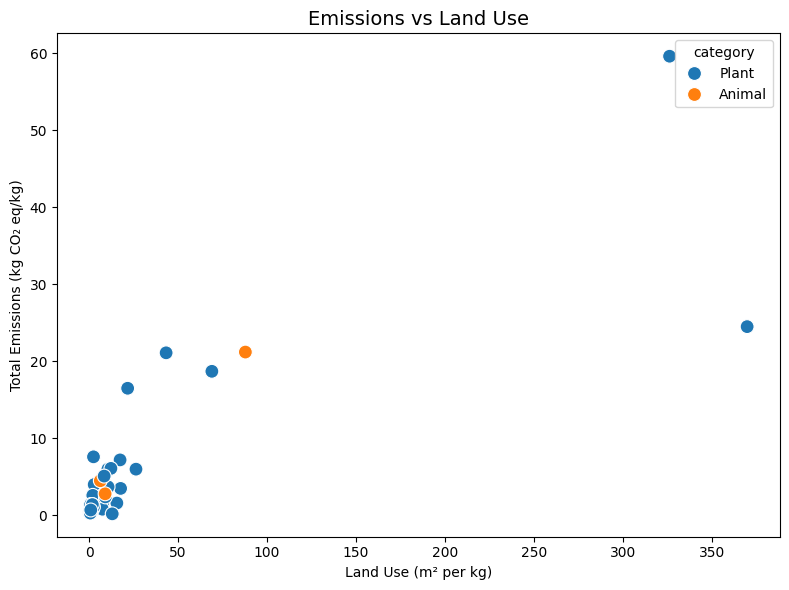

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='land_use_per_kilogram_(m²_per_kilogram)', y='total_emissions', hue='category', s=100)
plt.title("Emissions vs Land Use", fontsize=14)
plt.xlabel("Land Use (m² per kg)")
plt.ylabel("Total Emissions (kg CO₂ eq/kg)")
plt.tight_layout()
plt.show()

There’s a strong positive correlation meaning, foods with high emissions usually require more land.

Key Takeaways

- **Beef** and **lamb** are the highest emitters per kg of product.
- The **farm** stage contributes the largest portion of emissions overall.
- **Plant-based** foods tend to have significantly lower total emissions compared to animal-based foods.
- There's a strong correlation between **animal feed**, **farm**, and total emissions.
- High-impact foods could be targeted in sustainability campaigns and dietary shifts.